## Q1. What is Gradient Boosting Regression?

- Gradient boosting is a machine learning technique for regression and classification problems that produce a prediction model in the form of an ensemble of weak prediction models.
- This technique builds a model in a stage-wise fashion and generalizes the model by allowing optimization of an arbitrary differentiable loss function. 
- Gradient boosting basically combines weak learners into a single strong learner in an iterative fashion. As each weak learner is added, a new model is fitted to provide a more accurate estimate of the response variable.
- The new weak learners are maximally correlated with the negative gradient of the loss function, associated with the whole ensemble. 
- The idea of gradient boosting is that you can combine a group of relatively weak prediction models to build a stronger prediction model. 

- Gradient Boosting Regression is an analytical technique that is designed to explore the relationship between two or more variables (X, and Y). Its analytical output identifies important factors ( Xi ) impacting the dependent variable (y) and the nature of the relationship between each of these factors and the dependent variable.

## Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
df = pd.DataFrame({'area' :[1500,2000,1700,2600,3000,3200,3600,4000,3750,2900,4200,4500,6000,6500,5000,1000],'price':[205000,250000,215000,550000,565000,610000,600000,725000,615000,475000,705000,715000,800000,725000,825000,25000] })

In [191]:
df

,area,price
0,1500,205000
1,2000,250000
2,1700,215000
3,2600,550000
4,3000,565000
5,3200,610000
6,3600,600000
7,4000,725000
8,3750,615000
9,2900,475000


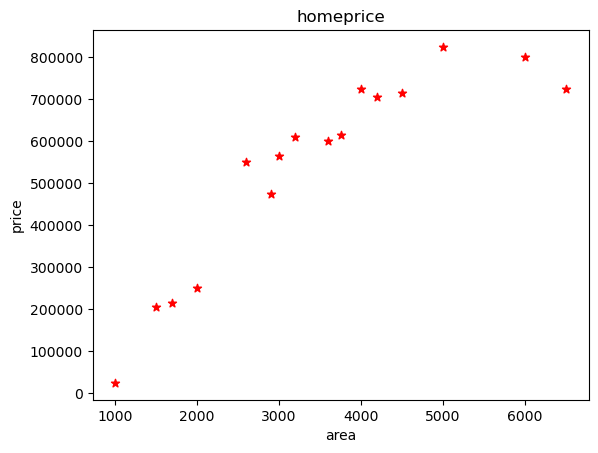

In [192]:
plt.xlabel('area')
plt.ylabel('price')
plt.title('homeprice')
plt.scatter(df.area,df.price,color = 'red',marker = "*")
plt.show()

In [193]:
X=df[["area"]]
y=df["price"]

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler=StandardScaler()

In [197]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [198]:
from sklearn.ensemble import GradientBoostingRegressor

In [199]:
grdreg = GradientBoostingRegressor()

In [200]:
grdreg.fit(X_train,y_train)

GradientBoostingRegressor()

In [201]:
y_predgrd = grdreg.predict(X_test)

In [202]:
## Performance Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE:",mean_squared_error(y_test,y_predgrd))#MSE
print("MAE:",mean_absolute_error(y_test,y_predgrd))#mAE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predgrd)))#RMSE

MSE: 9445603520.264349
MAE: 68974.49405827202
RMSE: 97188.49479369639


In [203]:
## R square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predgrd)
print("R squared :",score)

R squared : 0.9045860083208983


In [204]:
## Adjusted R square
#R2 = r2_score(actual, predicted)
#Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
#display adjusted R-squared
ajusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Ajusted R2:",ajusted_r2)

Ajusted R2: 0.8727813444278644


In [205]:
print(grdreg.predict([[3300]]))

[824939.01797591]


In [206]:
grdreg.score(X_test,y_test)

0.9045860083208983

In [207]:
grdreg.score(X_train,y_train)

0.9999997147204288

## Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

## Hyperparameter tunning with Grid search CV

In [208]:
from sklearn.model_selection import GridSearchCV

In [247]:
parameter={
    'n_estimators':range(10,100,10),
    #'loss':['squared_error','absolute_error'],
 'criterion':['friedman_mse','squared_error'],
  'max_depth':[1,2],
  'max_features':['auto','sqrt','log2'],
    'learning_rate' : [0.1,0.5,1,5,5.5],
}

In [248]:
clf=GridSearchCV(grdreg,param_grid=parameter,cv=5,scoring='r2')

In [260]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.1],
                         'max_depth': [1], 'max_features': ['auto'],
                         'n_estimators': [40]},
             scoring='r2')

In [261]:
clf.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 1,
 'max_features': 'auto',
 'n_estimators': 40}

In [262]:
y_predgrd = clf.predict(X_test)

In [263]:
## Performance Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE:",mean_squared_error(y_test,y_predgrd))#MSE
print("MAE:",mean_absolute_error(y_test,y_predgrd))#mAE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predgrd)))#RMSE

MSE: 12034089262.838911
MAE: 72393.84596549527
RMSE: 109699.99664010438


In [264]:
## Adjusted R square
#R2 = r2_score(actual, predicted)
#Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
#display adjusted R-squared
ajusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Ajusted R2:",ajusted_r2)

Ajusted R2: 0.8727813444278644


In [265]:
print(clf.predict([[3300]]))

[784272.6379345]


In [266]:
clf.score(X_train,y_train)

0.9803447339732111

In [267]:
clf.score(X_test,y_test)

0.8784386312291516

## Q4. What is a weak learner in Gradient Boosting?

- The weak learners here are the individual decision trees. 
- All the trees are connected in series and each tree tries to minimize the error of the previous tree. Due to this sequential connection, boosting algorithms are usually slow to learn (controllable by the developer using the learning rate parameter), but also highly accurate.

## Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

- Gradient Boosting is an supervised machine learning algorithm used for classification and regression problems. It is an ensemble technique which uses multiple weak learners to produce a strong model for regression and classification.

**Intuition:**

Gradient Boosting relies on the intuition that the best possible next model , when combined with the previous models, minimizes the overall prediction errors. The key idea is to set the target outcomes from the previous models to the next model in order to minimize the errors.


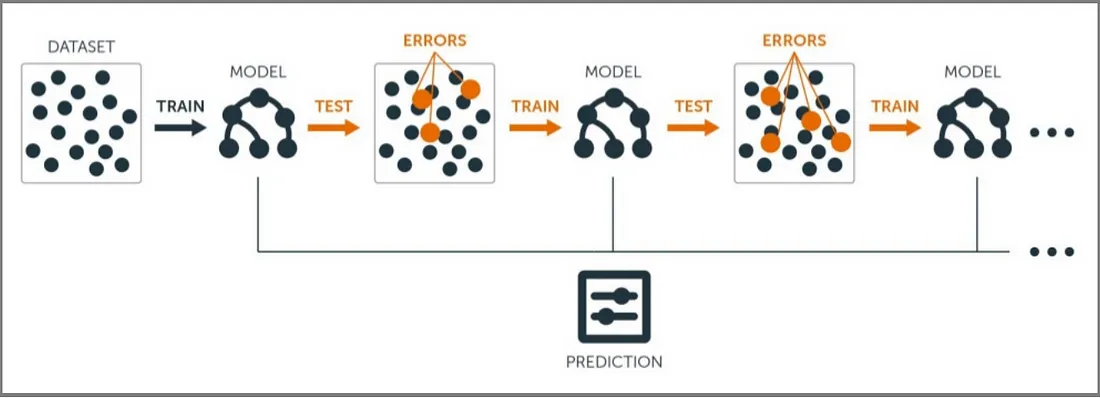

In [269]:
from IPython.display import Image
Image(filename='gradient.png') 

Input requirement for Gradient Boosting:

- A Loss Function to optimize.
- A weak learner to make prediction(Generally Decision tree).
- An additive model to add weak learners to minimize the loss function.

**1. Loss Function :**

The loss function basically tells how my algorithm, models the data set.In simple terms it is difference between actual values and predicted values.

A) Regression Loss functions:

- L1 loss or Mean Absolute Errors (MAE)
- L2 Loss or Mean Square Error(MSE)
- Quadratic Loss

B) Binary Classification Loss Functions:

- Binary Cross Entropy Loss
- Hinge Loss

A gradient descent procedure is used to minimize the loss when adding trees.

**2. Weak Learner:**

- Weak learners are the models which is used sequentially to reduce the error generated from the previous models and to return a strong model on the end.

- Decision trees are used as weak learner in gradient boosting algorithm.

**3. Additive Model:**

- In gradient boosting, decision trees are added one at a time (in sequence), and existing trees in the model are not changed.

##### Understanding Gradient Boosting Step by Step :
    
This is our data set.
Here Age, Sft., Location is independent variables and Price is dependent variable or Target variable.

In [305]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*ULI9uquBUWfbJ20SNrU3dA.png')
df = pd.DataFrame({"Age":[5,11,14,8,12,10],"Sft":[1500,2030,1442,2501,1300,1789],"Locatio":[5,12,6,4,9,11],"Price":[480,1090,350,1310,400,500]})

In [274]:
df

,Age,Sft,Locatio,Price
0,5,1500,5,480
1,11,2030,12,1090
2,14,1442,6,350
3,8,2501,4,1310
4,12,1300,9,400
5,10,1789,11,500


**Step 1:**
    
    Calculate the average/mean of the target variable.

In [275]:
import numpy as np
np.mean(df["Price"])

688.3333333333334

In [276]:
df["Avg_price"]=688

In [277]:
df

,Age,Sft,Locatio,Price,Avg_price
0,5,1500,5,480,688
1,11,2030,12,1090,688
2,14,1442,6,350,688
3,8,2501,4,1310,688
4,12,1300,9,400,688
5,10,1789,11,500,688


**Step 2:**
    
    Calculate the residuals for each sample.

Residual = Actual-Predicted_Value

**Step 3:**
    
    Construct a decision tree. We build a tree with the goal of predicting the Residuals.

In [283]:
Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*rRh2UY-HoGJeFfQ5RNVz2Q.png')

In the event if there are more residuals then leaf nodes(here its 6 residuals),some residuals will end up inside the same leaf. When this happens, we compute their average and place that inside the leaf.

-388+(-288)/2 =-388   402+622/2=512

- After this tree become like this.

In [284]:
Image(url='https://miro.medium.com/v2/resize:fit:828/format:webp/1*VsALULZw3gEnpp4VATfPbA.png')

**Step 4:**
        
        Predict the target label using all the trees within the ensemble.

Each sample passes through the decision nodes of the newly formed tree until it reaches a given lead. The residual in the said leaf is used to predict the house price.

In [ ]:
Output = base model(avg price in this case)+Learning rate * Residual predicted by decision tree

In [ ]:
=688(0.1)*(-338)

In [ ]:
=654.2

In [ ]:
=667.2(output)
#Calculation above for Residual value (-338) and (-208) in Step 2

Same way we will calculate the Predicted Price for other values

Note: We have initially taken 0.1 as learning rate.

**Step 5 :**
        
        Compute the new residuals

In [ ]:
Residual = Actual- predicted
Residual = 350-654.2=-304.2
        = 480-667.2=-187.2
#When Price is 350 and 480 Respectively.

With our Single leaf with average value(688) we have the below column of Residual.

In [285]:
df.head(2)

,Age,Sft,Locatio,Price,Avg_price
0,5,1500,5,480,688
1,11,2030,12,1090,688


In [286]:
df["Residual1"] = df['Price']-df["Avg_price"]

In [287]:
df

,Age,Sft,Locatio,Price,Avg_price,Residual1
0,5,1500,5,480,688,-208
1,11,2030,12,1090,688,402
2,14,1442,6,350,688,-338
3,8,2501,4,1310,688,622
4,12,1300,9,400,688,-288
5,10,1789,11,500,688,-188


With our decision tree ,we ended up the below new residuals.

In [298]:
df['Output_by_DT1'] = df["Avg_price"]+(0.1*df['Residual1'])

In [299]:
df

,Age,Sft,Locatio,Price,Avg_price,Residual1,Residual2,Output_by_DT1
0,5,1500,5,480,688,-208,-187.2,667.2
1,11,2030,12,1090,688,402,361.8,728.2
2,14,1442,6,350,688,-338,-304.2,654.2
3,8,2501,4,1310,688,622,559.8,750.2
4,12,1300,9,400,688,-288,-259.2,659.2
5,10,1789,11,500,688,-188,-169.2,669.2


In [293]:
df['Residual2']=df['Price']-df['Output_by_DT1']

In [300]:
df

,Age,Sft,Locatio,Price,Avg_price,Residual1,Residual2,Output_by_DT1
0,5,1500,5,480,688,-208,-187.2,667.2
1,11,2030,12,1090,688,402,361.8,728.2
2,14,1442,6,350,688,-338,-304.2,654.2
3,8,2501,4,1310,688,622,559.8,750.2
4,12,1300,9,400,688,-288,-259.2,659.2
5,10,1789,11,500,688,-188,-169.2,669.2


**Step 6:** 
    
    Repeat steps 3 to 5 until the number of iterations matches the number specified by the hyper parameter(numbers of estimators)

**Step 7:**
    
    Once trained, use all of the trees in the ensemble to make a final prediction as to value of the target variable. The final prediction will be equal to the mean we computed in Step 1 plus all the residuals predicted by the trees that make up the forest multiplied by the learning rate.

Here,

LR : Learning Rate

DT: Decision Tree

In [304]:
Image(url= "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*hOOvQbw9Jd_4yTc44wuPoA.png")

## Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

- In Gradient Boosting we are building different decision tree step by step by correcting the error of previous predicted tree.
  so at the end we can overcome all the misclassification and get the tree which gives us better result.

- The weak learners here are the individual decision trees. All the trees are connected in series and each tree tries to minimize the error of the previous tree. Due to this sequential connection, boosting algorithms are usually slow to learn (controllable by the developer using the learning rate parameter), but also highly accurate.

- In statistical learning, models that learn slowly perform better. The weak learners are fit in such a way that each new learner fits into the residuals of the previous step so as the model improves. The final model adds up the result of each step and thus a stronger learner is eventually achieved.

## Q5. What is the intuition behind the Gradient Boosting algorithm?

- Gradient boosting is a machine learning technique for regression and classification problems, which produces a model in the form of an ensemble of weak prediction models, **typically decision trees.**

- It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an **arbitrary differentiable loss function.**


- Gradient boosting involves three main steps. 


- 1. The first step that is required is that a **loss function be optimized**. The loss function must be diﬀerentiable. A loss function measures how well a machine learning model fits the data of a certain phenomenon. Different loss function may be used depending on the type of problem. Different loss function can be used on speech or image recognition, predicting the price of real estate, and describing user behavior on a web site. The loss function depends on the type of problem. For example, regression may use a squared error and classiﬁcation may use logarithmic loss.

- 2. The second step is the use of a weak learner. In gradient boosters, the weak learner is a decision tree. Speciﬁcally regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added to correct the residuals in the predictions of the previous iteration. 
    The algorithms for classification problems and for regression problems use a different algorithm, however, they both use the same approach for splitting the data into groups. 
    That approach is regression decision trees. Even classification problems use regression decision trees. In regression decision trees, the final answer is a range of real numbers, this makes it’s relatively simple to split the data based on the remaining error at each step. Steps are taken to ensure the weak learner remain weak yet is still constructed in a greedy fashion. It is common to constrain the weak learners in sundry ways. Often, weak learners can be constrained using a maximum number of layers, nodes, splits or leaf nodes.

- 3. The third step is combing many weak learners in an additive fashion. Decision trees are added one at a time. A gradient descent procedure is used to minimize the loss when adding trees. That’s the gradient part of gradient boosters. Gradient descent optimization in the machine learning world is typically used to find the parameters associated with a single model that optimizes some loss function. In contrast, gradient boosters are meta-models consisting of multiple weak models whose output is added together to get an overall prediction. The gradient descent optimization occurs on the output of the model and not the parameters of the weak models.

- Let’s look at this process pictorially. Below we can see that gradient boosting adds sub-models incrementally to minimize a loss function. Earlier we said that gradient boosting involved three main steps. In our example below the weak learner being used is a decision tree. Secondly, the trees are added sequentially. Lastly, the error of the model is being reduced.

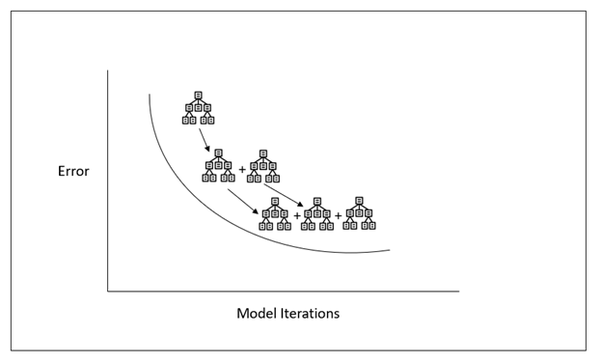

In [306]:
Image("gradient_intution.jpg")